<a href="https://colab.research.google.com/github/Shallyquinn/data-science/blob/main/image_steg_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/val"

# Calculate image statistics using ImageDataGenerator
def calculate_image_statistics(directory):
    image_data_generator = ImageDataGenerator(rescale=1.0/255)
    image_iterator = image_data_generator.flow_from_directory(
        directory,
        target_size=(224, 224),  # Adjust the target size as needed
        batch_size=1,
        class_mode='binary',  # Assuming binary labels
        shuffle=False
    )

    num_images = len(image_iterator.filenames)
    image_sum = 0
    image_squared_sum = 0

    for _ in range(num_images):
        image, _ = next(image_iterator)
        image_sum += image.mean()
        image_squared_sum += (image ** 2).mean()

    mean = image_sum / num_images
    std = (image_squared_sum / num_images - mean ** 2) ** 0.5

    return mean, std

train_mean, train_std = calculate_image_statistics(train_dir)
test_mean, test_std = calculate_image_statistics(test_dir)
val_mean, val_std = calculate_image_statistics(val_dir)

print(f"Train Set: Mean = {train_mean:.4f}, Std = {train_std:.4f}")
print(f"Test Set: Mean = {test_mean:.4f}, Std = {test_std:.4f}")
print(f"Validation Set: Mean = {val_mean:.4f}, Std = {val_std:.4f}")

Found 16000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Train Set: Mean = 0.3790, Std = 0.3854
Test Set: Mean = 0.3493, Std = 0.3737
Validation Set: Mean = 0.3388, Std = 0.3714


                    Width                                                 \
                    count   mean  std    min    25%    50%    75%    max   
Split      Class                                                           
Test       clean   2000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0   
           stego   6000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0   
Train      clean   4000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0   
           stego  12000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0   
Validation clean   2000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0   
           stego   6000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0   

                   Height                                                 
                    count   mean  std    min    25%    50%    75%    max  
Split      Class                                                          
Test       clean   2000.0  512.0  0.0  512.0  512.0  512.0  512.0  512.0  
           steg

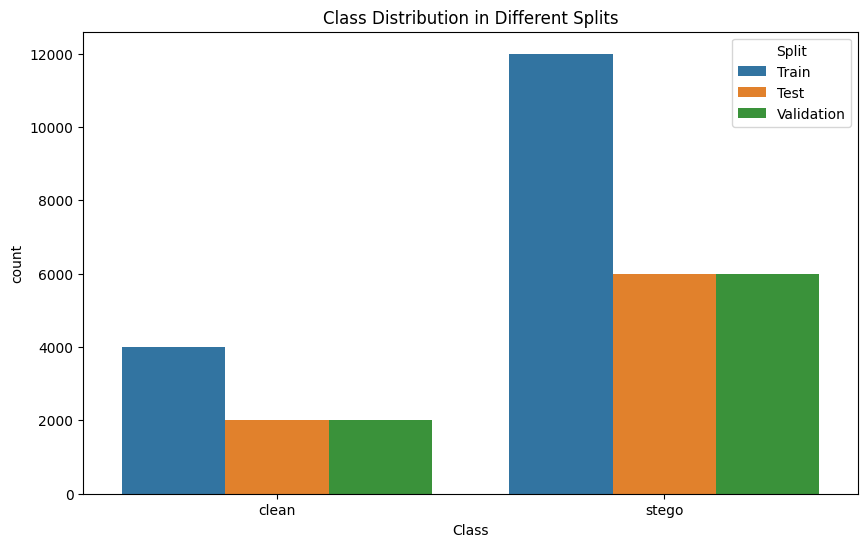

In [ ]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/val"


# Create a DataFrame to store image information
data = []

for split, split_dir in [("Train", train_dir), ("Test", test_dir), ("Validation", val_dir)]:
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)
            width, height = image.size
            data.append({
                "Split": split,
                "Class": class_name,
                "ImageName": image_name,
                "Width": width,
                "Height": height
            })

df = pd.DataFrame(data)

# Display basic statistics about the dataset
print(df.groupby(["Split", "Class"]).describe())

# Perform exploratory data analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Class", hue="Split")
plt.title("Class Distribution in Different Splits")
plt.show()

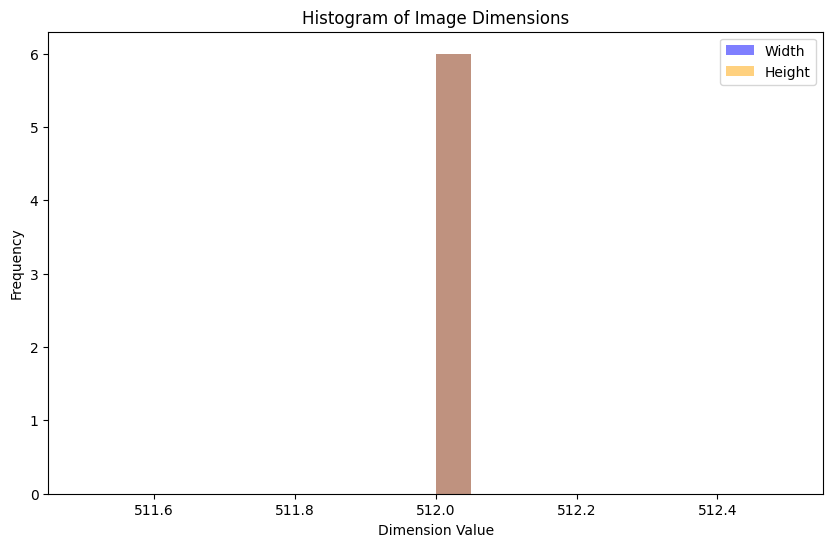

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/val"

# Initialize empty lists to store image dimensions
widths = []
heights = []

# Loop through all image files in the directory
for split, image_dir in [("Train", train_dir), ("Test", test_dir), ("Validation", val_dir)]:
    for filename in os.listdir(image_dir):
       if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(image_dir, filename)

       with Image.open(image_path) as img:
           width, height = img.size
           widths.append(width)
           heights.append(height)

# Create histograms for widths and heights
plt.figure(figsize=(10, 6))
plt.hist(widths, bins=20, alpha=0.5, color='blue', label='Width')
plt.hist(heights, bins=20, alpha=0.5, color='orange', label='Height')
plt.title('Histogram of Image Dimensions')
plt.xlabel('Dimension Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


                 Type  Train  Test  Validation  Total
0               Clean   4000  2000        2000   8000
1          JavaScript   2363  1188        1214   4765
2  JavaScript in HTML   2284  1167        1162   4613
3          PowerShell   2468  1164        1213   4845
4  Ethereum Addresses   2473  1247        1193   4913
5    URL/IP addresses   2412  1234        1218   4864


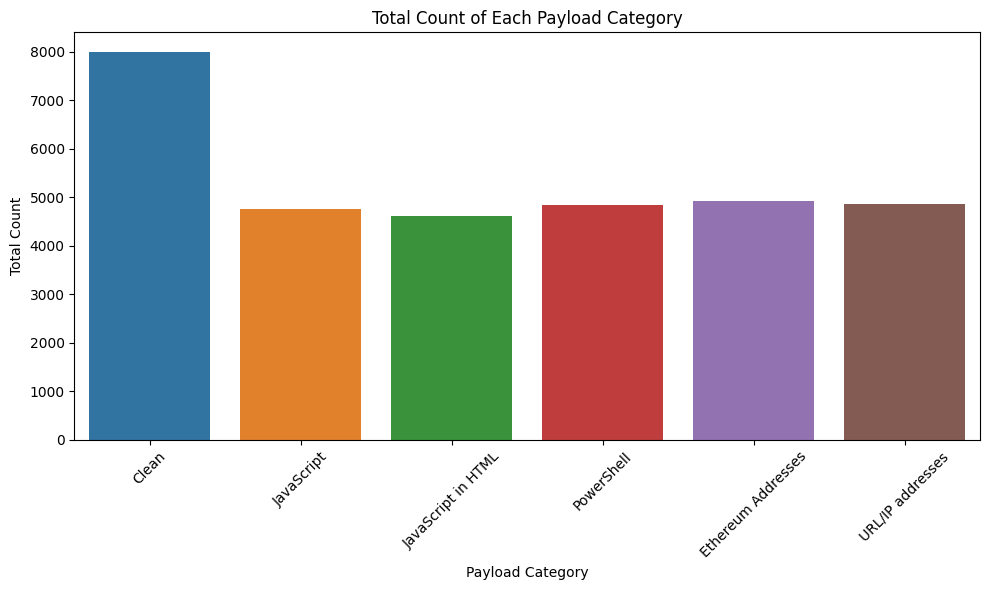

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the dataset information
data = {
    "Type": ["Clean", "JavaScript", "JavaScript in HTML", "PowerShell", "Ethereum Addresses", "URL/IP addresses"],
    "Train": [4000, 2363, 2284, 2468, 2473, 2412],
    "Test": [2000, 1188, 1167, 1164, 1247, 1234],
    "Validation": [2000, 1214, 1162, 1213, 1193, 1218]
}
df = pd.DataFrame(data)

# Calculate the total count for each category
df["Total"] = df["Train"] + df["Test"] + df["Validation"]

# Display the DataFrame
print(df)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the total count of each category
sns.barplot(x="Type", y="Total", data=df)
plt.title("Total Count of Each Payload Category")
plt.xlabel("Payload Category")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Found 16000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


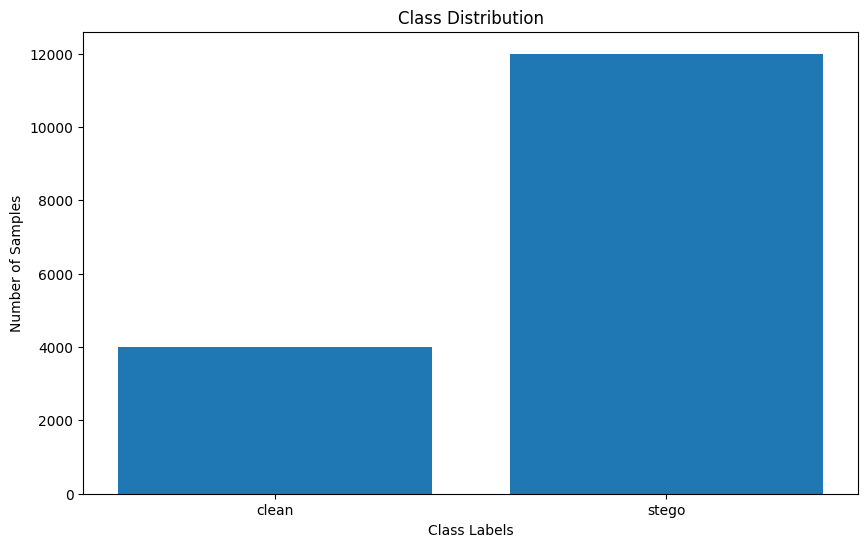

The dataset is imbalanced.


In [ ]:
#clean code
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Set the directories for train, test, and validation data
train_dest_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/train"
test_dest_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/test"
val_dest_dir = "/content/drive/MyDrive/Colab Notebooks/extracted_dataset_real/dataset/val"

# Define image data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

# Create data generators for train, test, and validation data
batch_size=256
target_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_dest_dir,
    class_mode="binary",
    seed=1337,
    target_size=target_size,
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dest_dir,
    class_mode="binary",
    target_size=target_size,
    seed=1337,
    batch_size=batch_size
)

val_generator = val_datagen.flow_from_directory(
    val_dest_dir,
    class_mode="binary",
    target_size=target_size,
    seed=1337,
    batch_size=batch_size
)

# Extract class labels and indices
train_labels = train_generator.classes
train_indices = train_generator.class_indices
train_num_classes = len(train_indices)

# Calculate the count of each class label
class_counts = np.bincount(train_labels)

# Assuming you have class names for reference (replace with your class names)
class_names = ["clean", "stego"]

# Plot the distribution of class labels
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

# Check if the dataset is imbalanced by setting a threshold ratio
threshold_ratio = 0.1  # You can adjust this threshold as needed

# Find the smallest and largest class count
min_class_count = np.min(class_counts)
max_class_count = np.max(class_counts)

# Calculate the imbalance ratio
imbalance_ratio = max_class_count / min_class_count

# Check if the imbalance ratio exceeds the threshold
if imbalance_ratio > threshold_ratio:
    print("The dataset is imbalanced.")
else:
    print("The dataset is not significantly imbalanced.")

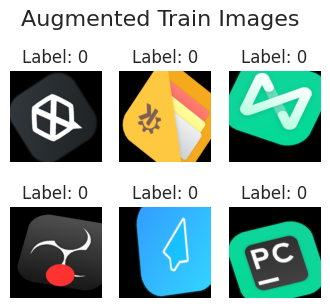

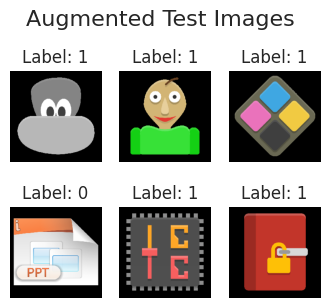

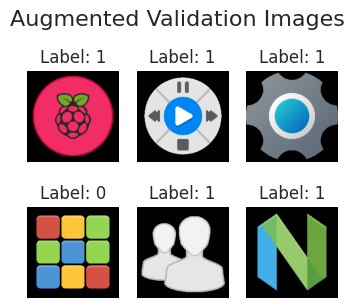

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have generators named train_generator, test_generator, and val_generator

# Visualizing the augmented data for the train set
plt.figure(figsize=(4, 5))
plt.suptitle('Augmented Train Images', fontsize=16)  # Add a main title

for t in range(6):
    train_images, train_labels = next(train_generator)
    train_augmented_images = train_images[t]  # Extract an augmented image from the batch
    ax = plt.subplot(3, 3, t + 1)
    plt.imshow(train_augmented_images)
    plt.title("Label: " + str(int(train_labels[t])))
    plt.axis("off")

plt.show()

# Visualizing the augmented data for the test set
plt.figure(figsize=(4, 5))
plt.suptitle('Augmented Test Images', fontsize=16)  # Add a main title

for t in range(6):
    test_images, test_labels = next(test_generator)
    test_augmented_images = test_images[t]  # Extract an augmented image from the batch
    ax = plt.subplot(3, 3, t + 1)
    plt.imshow(test_augmented_images)
    plt.title("Label: " + str(int(test_labels[t])))
    plt.axis("off")

plt.show()

# Visualizing the augmented data for the validation set
plt.figure(figsize=(4, 5))
plt.suptitle('Augmented Validation Images', fontsize=16)  # Add a main title

for t in range(6):
    val_images, val_labels = next(val_generator)
    val_augmented_images = val_images[t]  # Extract an augmented image from the batch
    ax = plt.subplot(3, 3, t + 1)
    plt.imshow(val_augmented_images)
    plt.title("Label: " + str(int(val_labels[t])))
    plt.axis("off")

plt.show()

In [ ]:

# Define a CNN model for feature extraction
feature_extractor = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten()
])

# Print summary of the feature extractor model
feature_extractor.summary()

# Extract features from the augmented train dataset
train_features = feature_extractor.predict(train_generator)
print("Train features shape:", train_features.shape)

# Extract features from the validation dataset
val_data, val_labels = val_generator.next()
val_features = feature_extractor.predict(val_data)
print("Validation features shape:", val_features.shape)

# Extract features from the test dataset
test_data, test_labels = test_generator.next()
test_features = feature_extractor.predict(test_data)
print("Test features shape:", test_features.shape)

# Save the feature extractor model architecture and weights
feature_extractor.save('feature_extractor_weights.h5')

# Define the path where you want to save the model on Google Drive
save_path = '/content/drive/MyDrive/Colab Notebooks/feature_extractor_weights.h5'

# Save the model
feature_extractor.save(save_path)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

Test features shape: (256, 36864)


Resampled Train features: (24000, 36864)


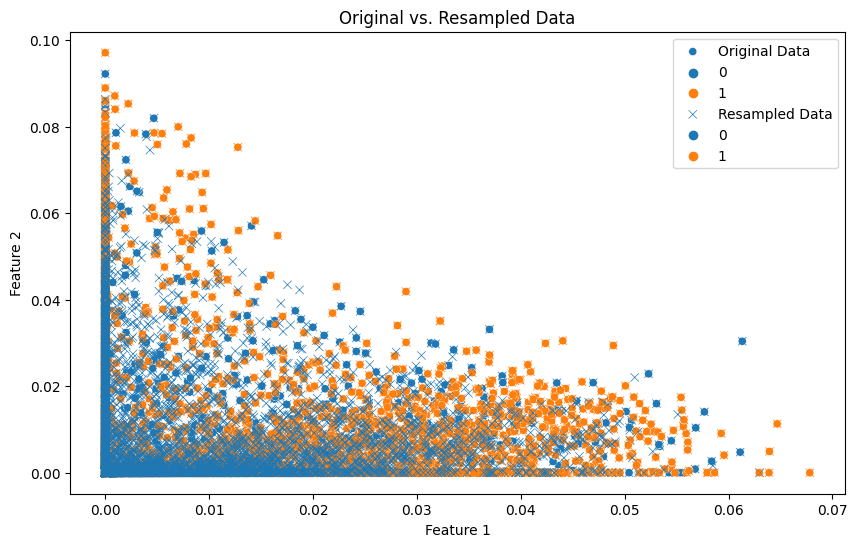

In [ ]:
#clean code
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the saved model on Google Drive
model_path = '/content/drive/MyDrive/Colab Notebooks/feature_extractor_weights.h5'  # Update with your actual path

# Load the saved model
feature_extractor = tf.keras.models.load_model(model_path)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=10)
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels)
print('Resampled Train features:' ,train_features_resampled.shape)

# Visualize the resampled data using a scatter plot
plt.figure(figsize=(10, 6))

# Plot the original data points
sns.scatterplot(x=train_features[:, 0], y=train_features[:, 1], hue=train_labels, marker='o', label='Original Data')

# Plot the resampled data points
sns.scatterplot(x=train_features_resampled[:, 0], y=train_features_resampled[:, 1], hue=train_labels_resampled, marker='x', label='Resampled Data')

plt.title("Original vs. Resampled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

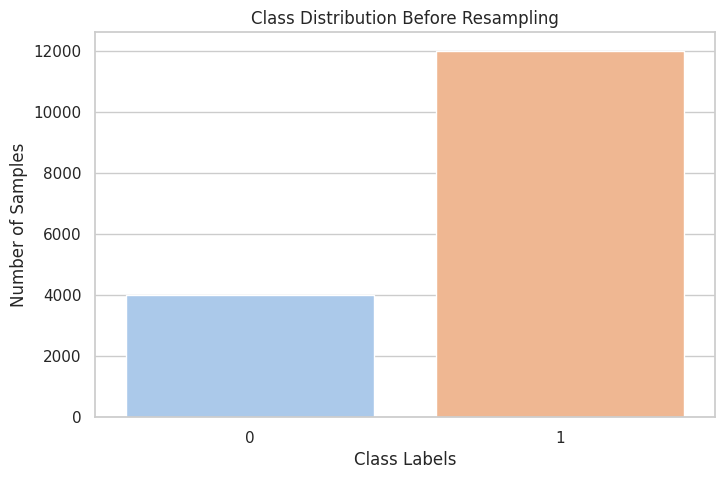

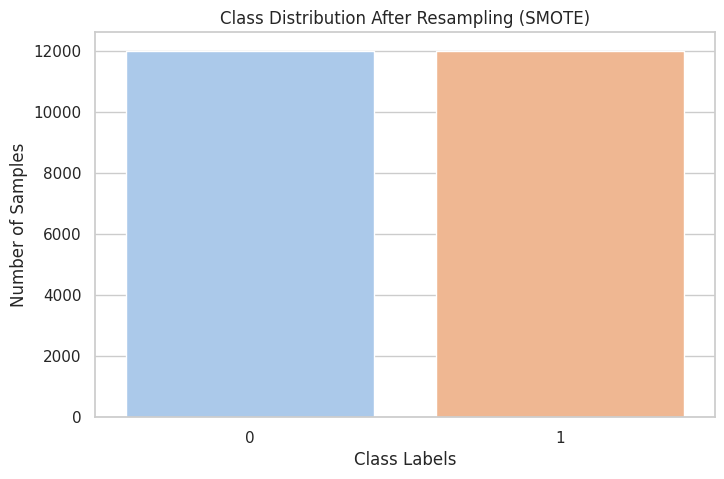

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the count of each class label before resampling
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x=train_labels, palette="pastel")
plt.title("Class Distribution Before Resampling")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.show()

# Calculate the count of each class label after resampling
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x=train_labels_resampled, palette="pastel")
plt.title("Class Distribution After Resampling (SMOTE)")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.show()




In [ ]:
#clean code
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support)
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import joblib
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=12)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [5, 25],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=2)

# Train the Random Forest Classifier with cross-validation
grid_search.fit(train_features_resampled, train_labels_resampled)

# Get the best hyperparameters from the GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the Random Forest Classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_params, random_state=12)

# Train the classifier on the resampled training data
rf_classifier.fit(train_features_resampled, train_labels_resampled)

# Save the trained Random Forest Classifier
joblib.dump(rf_classifier, 'rf_classifier_weights.joblib')

In [ ]:
# Define the path where you want to save the model on Google Drive
save_path = '/content/drive/MyDrive/Colab Notebooks/rf_classifier_weights.joblib'

# Save the model to Google Drive
with open(save_path, 'wb') as f:
    joblib.dump(rf_classifier, f)

In [ ]:
# Define the path to the saved model on Google Drive
model_path_rf = '/content/drive/MyDrive/Colab Notebooks/rf_classifier_weights.joblib'  # Update with your actual path

# Load the saved model

rf_classifier = joblib.load(model_path_rf)

# Make predictions on the validation data using the trained RandomForestClassifier
val_predictions = rf_classifier.predict(val_features)

# Calculate accuracy
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Calculate precision, recall, F1-score, and support using precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(val_labels, val_predictions, average='binary')
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-score:", f1)

# Generate ROC curve
val_probabilities = rf_classifier.predict_proba(val_features)[:, 1]
fpr, tpr, _ = roc_curve(val_labels, val_probabilities)
roc_auc = roc_auc_score(val_labels, val_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0, 1], ['Clean', 'Stego'])
plt.yticks([0, 1], ['Clean', 'Stego'])
plt.show()


# Generate classification report
class_report = classification_report(val_labels, val_predictions)
print("Classification Report:")
print(class_report)


Test Accuracy: 0.75
Test Precision: 0.7901785714285714
Test Recall: 0.9123711340206185
Test F1-score: 0.8468899521531099


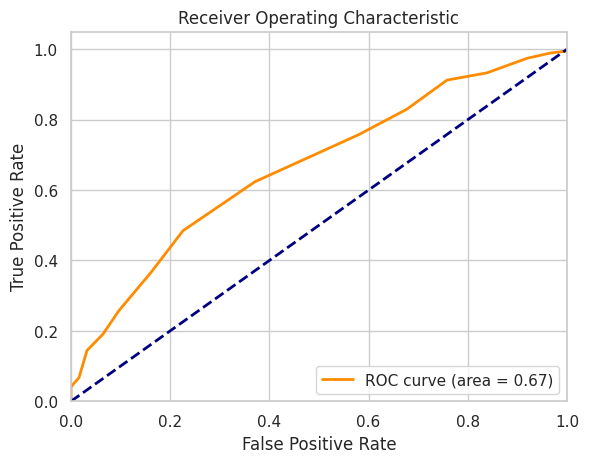

Confusion Matrix:
[[ 15  47]
 [ 17 177]]


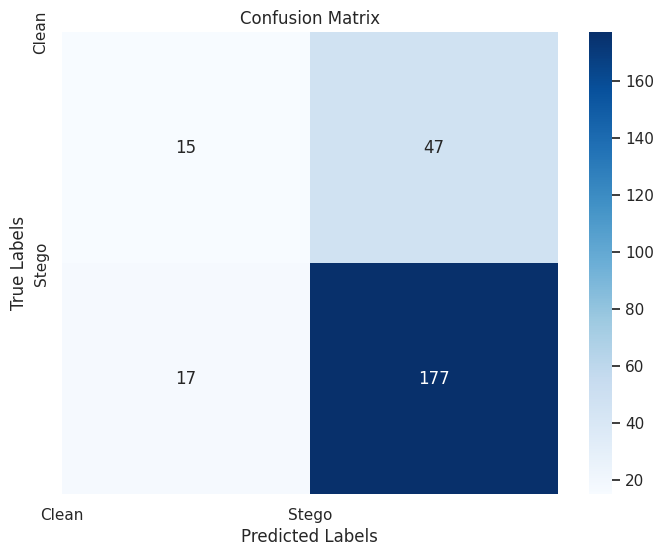

ROC-AUC Score: 0.6659461257066844
Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.24      0.32        62
         1.0       0.79      0.91      0.85       194

    accuracy                           0.75       256
   macro avg       0.63      0.58      0.58       256
weighted avg       0.71      0.75      0.72       256



In [ ]:
# Make predictions on the validation data using the trained RandomForestClassifier
test_predictions = rf_classifier.predict(test_features)

# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, F1-score, and support using precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(test_labels, test_predictions, average='binary')
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

# Generate ROC curve
test_probabilities = rf_classifier.predict_proba(test_features)[:, 1]
fpr, tpr, _ = roc_curve(test_labels, test_probabilities)
roc_auc = roc_auc_score(test_labels, test_probabilities)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
test_conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(test_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0, 1], ['Clean', 'Stego'])
plt.yticks([0, 1], ['Clean', 'Stego'])
plt.show()

# Print ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Generate classification report
class_report = classification_report(test_labels,test_predictions, zero_division=1)
print("Classification Report:")
print(class_report)